In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

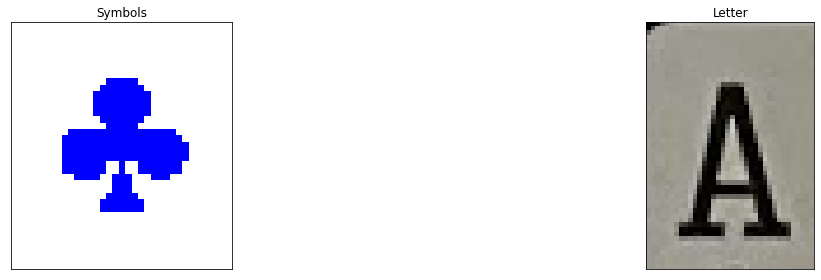

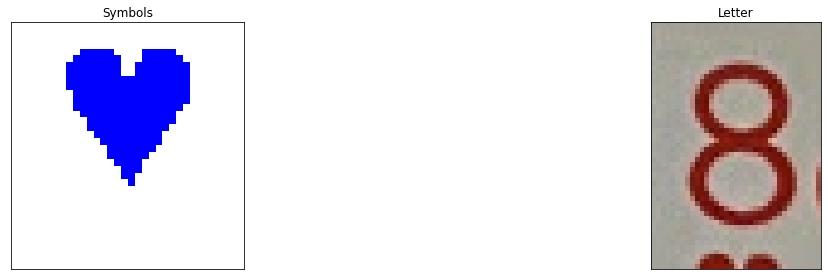

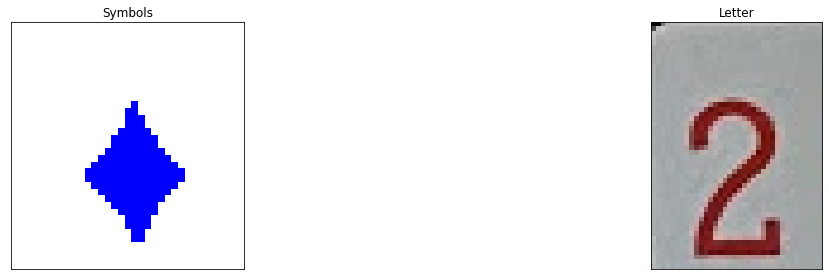

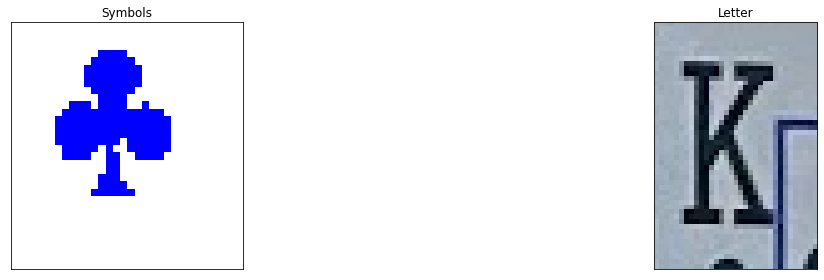

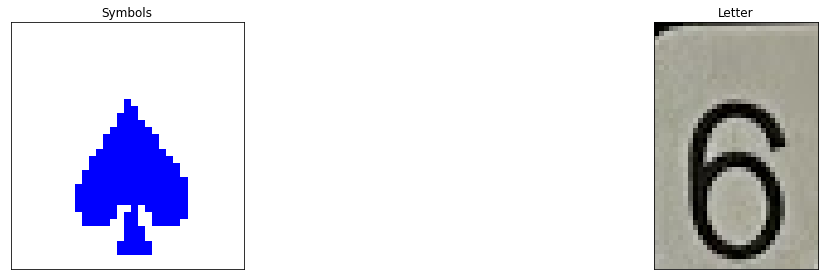

In [6]:
img = cv2.imread("blackcard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
#inverse = cv2.bitwise_not(B)
C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(C, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i = 0




while i < 5:
  largestContour = C[i]

  x,y,w,h = cv2.boundingRect(largestContour)

  ROI = img[y:y+h,x:x+w]

  H,W,Channels = ROI.shape

  cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]

  cropped_symbol = ROI[50:int(H * 0.3), 4:int(W * 0.2)]

  G = cv2.cvtColor(cropped_symbol, cv2.COLOR_BGR2GRAY)
  T = 120
  T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
  inverse = cv2.bitwise_not(B)
  sContour,_ = cv2.findContours(inverse, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
  sC = sorted(sContour, key=cv2.contourArea, reverse=True)
  #cropped_symbol = cv2.drawContours(cropped_symbol, sC[0], contourIdx=-1, color=(0,0,255), thickness=1) 

  cropped = cropped_symbol
  croppedH, croppedW, croppedChannels = cropped.shape 
  img_3 = np.zeros([croppedH,croppedW,3],dtype=np.uint8)
  img_3.fill(255)
  cv2.fillPoly(img_3, pts =[(sC[0])], color=(0,0,255))

  G = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)
  T = 120
  T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
  #inverse = cv2.bitwise_not(B)
  
  cropped_symbol = cv2.bitwise_and(cropped,cropped, mask= inverse)
  kernel = np.ones((5,5),np.float32)/25
  cropped_symbol = cv.filter2D(cropped_symbol,-1,kernel)

  plt.figure(2, figsize=(20,10)) #plots each clicked cell beside the isolated version so it can be looked back over
  chosenCell = plt.subplot(221)
  chosenCell.set_title("Symbols")
  plt.imshow(img_3, cmap='gray'), plt.xticks([]),plt.yticks([])

  isolated = plt.subplot(222)
  isolated.set_title("Letter")
  plt.imshow(cropped_letter, cmap='gray'), plt.xticks([]),plt.yticks([])
  plt.show()

  i = i + 1

cv2.imshow("b", B)



